## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
from scipy import stats

In [6]:
df = pd.read_csv('data/human_body_temperature.csv')

1. Is the distribution of body temperatures normal

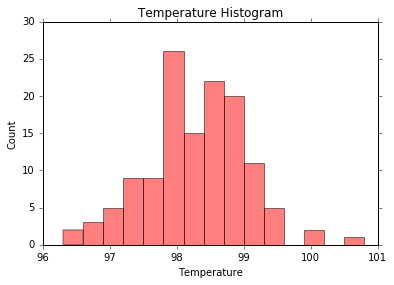

In [7]:
# plot histogram of temperature
temp = df.temperature
plt.hist(temp,15, facecolor = 'red', alpha = 0.5)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [10]:
# normality test
p = stats.mstats.normaltest(temp)
if p.pvalue > 0.05:
    print 'Temperature is normal distribution, p = ',p.pvalue
else:
    print 'Temperature is not normal distribution, p = ', p.pvalue

Temperature is normal distribution, p =  0.258747986349


2.Is the true population mean really 98.6 degrees F?

In [32]:
# Null hypothesis: temp mean = 98.6 F
# Alternative hypothesis: temp mean != 98.6 F
# mean of temperature
N,min_max,Tempmean, var,skew,kurt = stats.describe(temp)
# number of samples, N >30, Z test
N = len(temp)
# one sample t test
t,prob = stats.ttest_1samp(temp,98.6)
print t
print prob
if prob<0.05:
    print 'The true population mean is not equal to 98.6 F'
else:
    print 'The true population is euqal to 98.6F'

-5.45482329236
2.41063204156e-07
The true population mean is not equal to 98.6 F


3.At what temperature should we consider someone's temperature to be "abnormal"?

In [23]:
# define confidence interval
CI = 0.95
alpha = 1-CI
std = math.sqrt(var)
interval = stats.norm.interval(alpha, loc = Tempmean, scale = std)
print 'Confidence interval of CI is ', interval

Confidence interval of CI is  (98.203255215747902, 98.295206322713597)


4.Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

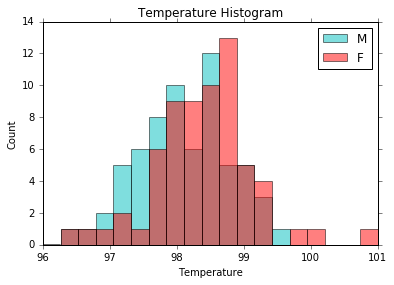

In [44]:
# get temperature of man/woman
MTemp = df.temperature[df.gender == 'M']
FTemp = df.temperature[df.gender == 'F']
bins = np.linspace(96,101,20)

plt.hist(MTemp,bins, facecolor = 'c', label = 'M',alpha = 0.5)
plt.hist(FTemp,bins, facecolor = 'r', label = 'F',alpha = 0.5)
plt.legend(loc = 'upper right')
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


In [36]:

# two-sample t test
t,p = stats.ttest_ind(MTemp,FTemp,equal_var = False)
print t
print p
if p <0.05:
    print 'There is a significant difference between males and females in normal temperature'
else:
    print 'No significatn different between males and females in normal temperture'

-2.28543453817
0.0239382641829
There is a significant difference between males and females in normal temperature
